### Tests - demo of functionality

#### 0. Import basic methods (a.o. from source2.py)

In [1]:
from source2 import *

In [2]:
# load basic info from the Input sheet
mapping = load_input_from_xls(filename=r'H2 Model - Input sheet - basic test.xlsm')
Inputs = extract_scenario(mapping, 'Scenario1')

In [3]:
foundation_data = get_object_data(Inputs=Inputs, 
                               subsystem='Wind energy source & Transport', 
                               element='Offshore wind park',
                               component='Foundation & cable')
foundation_data['depreciation_rate']=1/foundation_data['economic_lifetime']
display(foundation_data)

{'sub_system': 'Wind energy source & Transport',
 'element': 'Offshore wind park',
 'component': 'Foundation & cable',
 'escalation_base_year': 2023,
 'escalation_rate': 0.02,
 'capex_per_unit': 934204,
 'capex_per_unit_units': 'EUR / MW',
 'unit': 3000,
 'unit_units': 'MW',
 'construction_duration': 3,
 'share_of_investments': [0.2, 0.4, 0.4],
 'economic_lifetime': 30,
 'depreciation_flag': 1,
 'depreciation_rate': 0.03333333333333333,
 'yearly_variable_costs_flag': 1,
 'yearly_variable_costs_rate': 0.015,
 'insurance_flag': 1,
 'insurance_rate': 0.005,
 'decommissioning_rate': 0.02,
 'residual_value': 0.01}

##### TEST001 
* escalation_base_year: 2023
* Lifecycle: 40
* startyear: 2023
* construction_duration: 3
* economic_lifetime: 30

Lifecycle selected long enough to encompass at least 1 economic lifetime + sufficient time to reinvest capex + 6 operational years before divestment and decommisioning

In [4]:
# create Foundation object
Foundation = Object(**foundation_data)

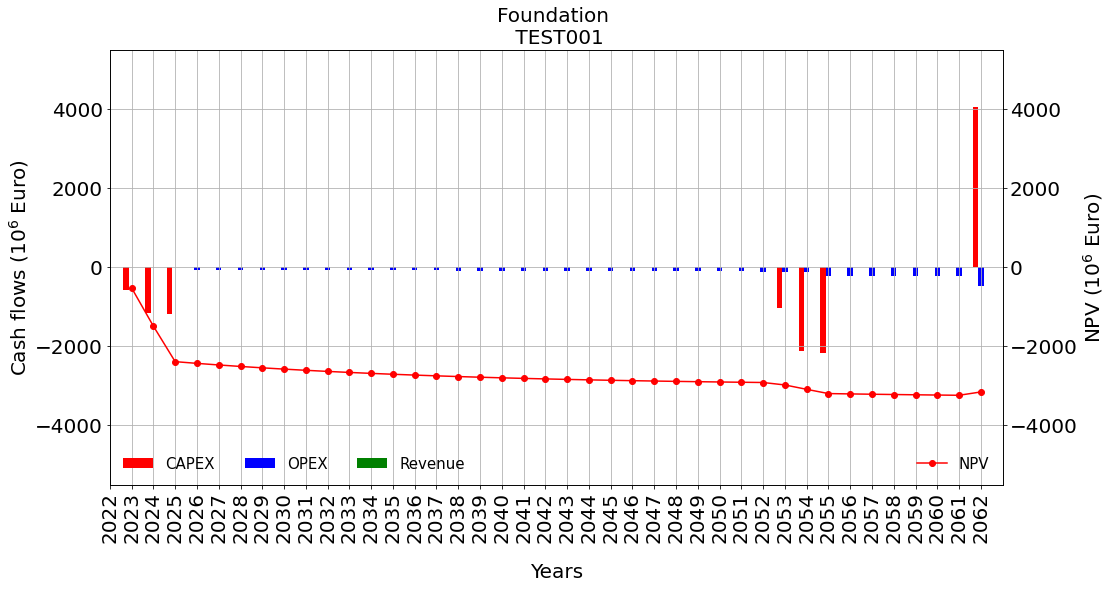

In [5]:
Foundation.generate_cashflows(startyear=2023, lifecycle=40, debug=False)
Foundation.df_npv = calculate_npv(Foundation.df, 2023, WACC=0.0984)
create_npv_plot(Foundation.df_npv, title='Foundation \n TEST001')

##### TEST002
* escalation_base_year: 2023
* Lifecycle: 70
* startyear: 2023
* construction_duration: 3
* economic_lifetime: 30

Lifecycle selected long enough to encompass at least 2 economic lifetimes + sufficient time to reinvest capex + 6 operational years before divestment and decommisioning

In [6]:
# create Foundation object
Foundation = Object(**foundation_data)

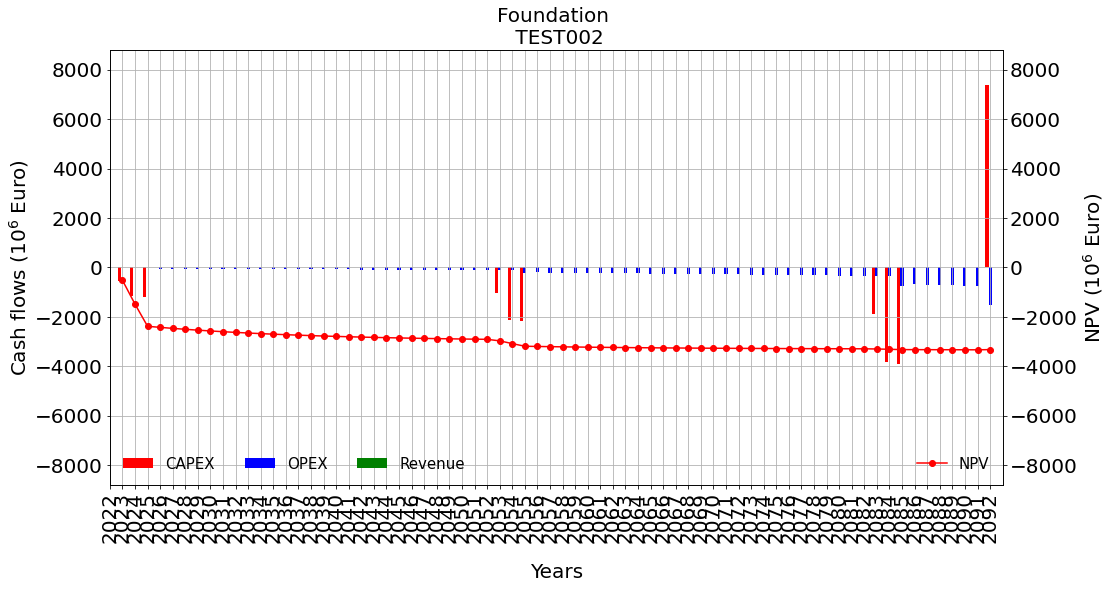

In [7]:
Foundation.generate_cashflows(startyear=2023, lifecycle=70, debug=False)
Foundation.df_npv = calculate_npv(Foundation.df, 2023, WACC=0.0984)
create_npv_plot(Foundation.df_npv, title='Foundation \n TEST002')

##### TEST003
* escalation_base_year: 2023
* Lifecycle: 30
* startyear: 2023
* construction_duration: 3
* economic_lifetime: 30

Lifecycle selected exactly 1 economic lifetime

In [8]:
# create Foundation object
Foundation = Object(**foundation_data)

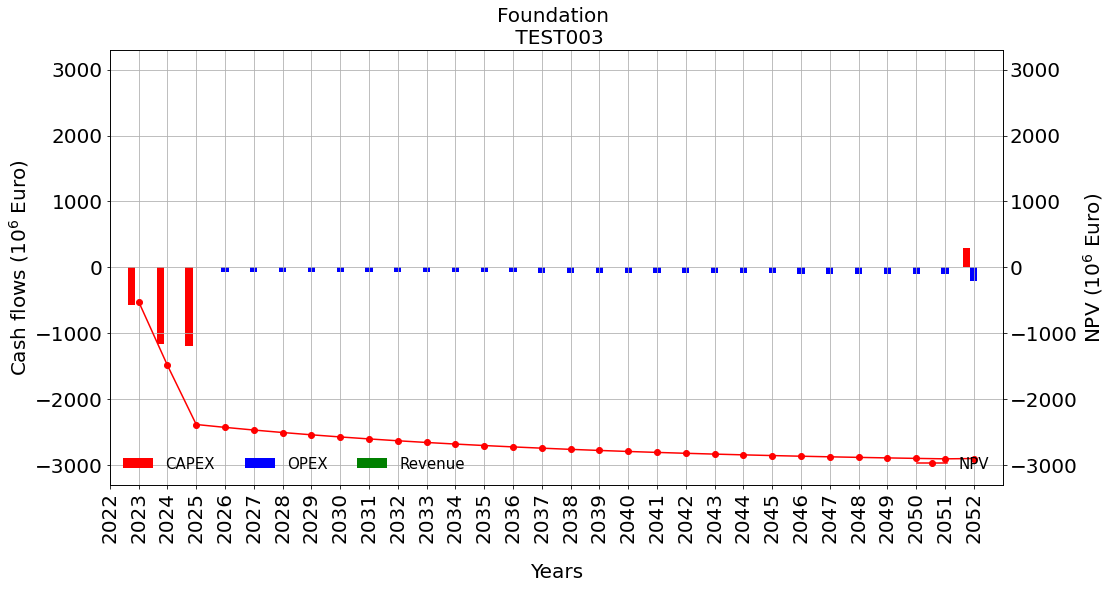

In [9]:
Foundation.generate_cashflows(startyear=2023, lifecycle=30, debug=False)
Foundation.df_npv = calculate_npv(Foundation.df, 2023, WACC=0.0984)
create_npv_plot(Foundation.df_npv, title='Foundation \n TEST003' )

##### TEST004
* escalation_base_year: 2023
* Lifecycle: 31
* startyear: 2023
* construction_duration: 3
* economic_lifetime: 30

Lifecycle selected exactly 1 economic lifetime + 1 year (not enough to complete new capex cycle)

In [10]:
# create Foundation object
Foundation = Object(**foundation_data)

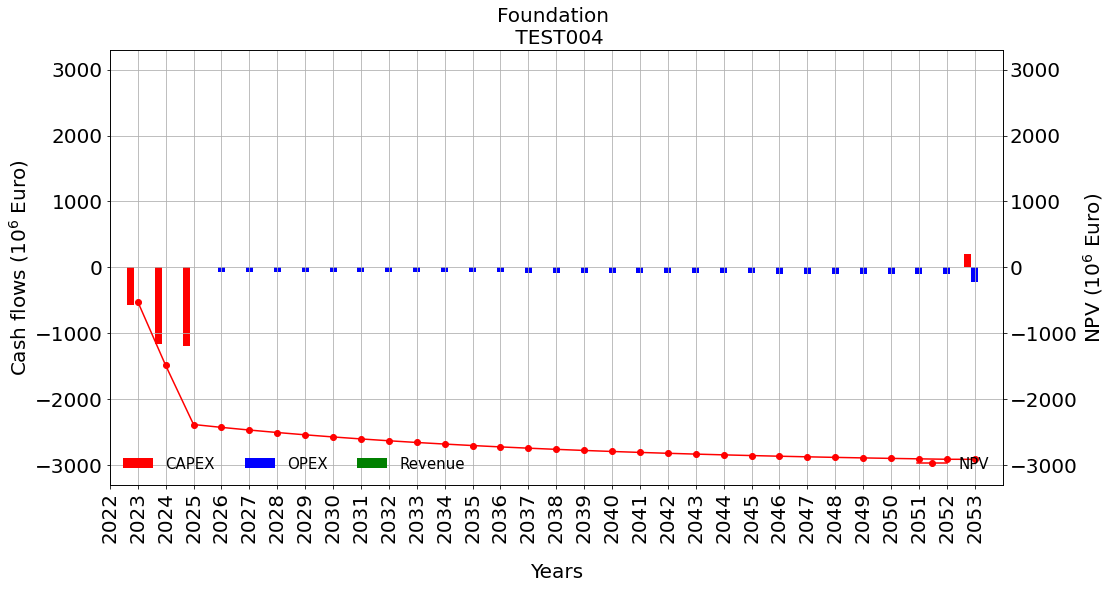

In [11]:
Foundation.generate_cashflows(startyear=2023, lifecycle=31, debug=False)
Foundation.df_npv = calculate_npv(Foundation.df, 2023, WACC=0.0984)
create_npv_plot(Foundation.df_npv, title='Foundation \n TEST004' )

##### TEST005
* escalation_base_year: 2023
* Lifecycle: 32
* startyear: 2023
* construction_duration: 3
* economic_lifetime: 30

Lifecycle selected exactly 1 economic lifetime + 2 years (not enough to complete new capex cycle)

In [12]:
# create Foundation object
Foundation = Object(**foundation_data)

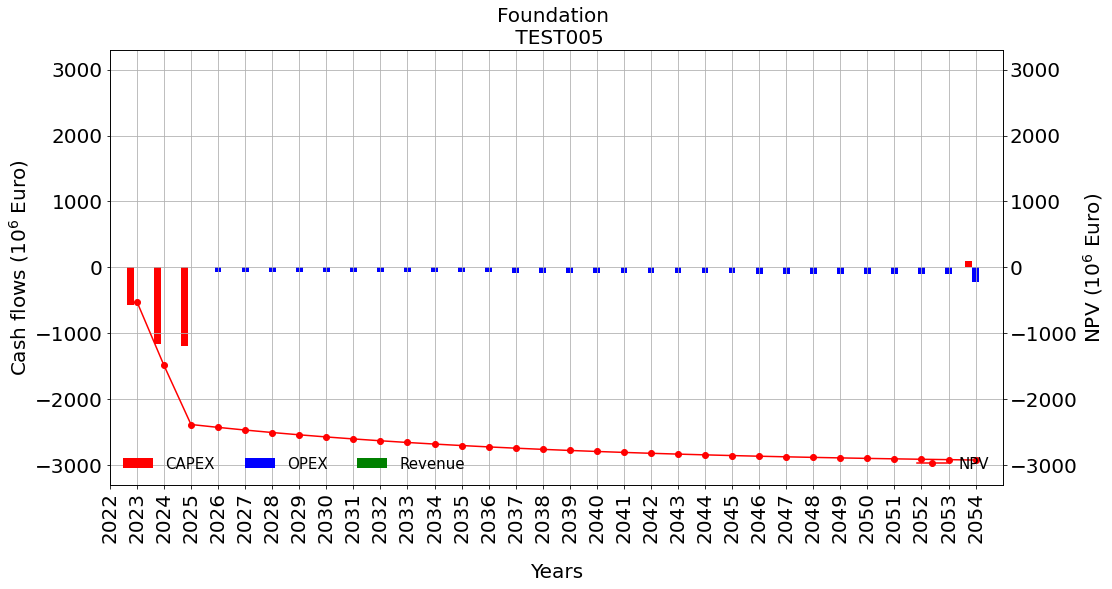

In [13]:
Foundation.generate_cashflows(startyear=2023, lifecycle=32, debug=False)
Foundation.df_npv = calculate_npv(Foundation.df, 2023, WACC=0.0984)
create_npv_plot(Foundation.df_npv, title='Foundation \n TEST005' )

##### TEST006
* escalation_base_year: 2023
* Lifecycle: 33
* startyear: 2023
* construction_duration: 3
* economic_lifetime: 30

Lifecycle selected exactly 1 economic lifetime + 3 years (enough to complete new capex cycle, but not one operational year)

In [14]:
# create Foundation object
Foundation = Object(**foundation_data)

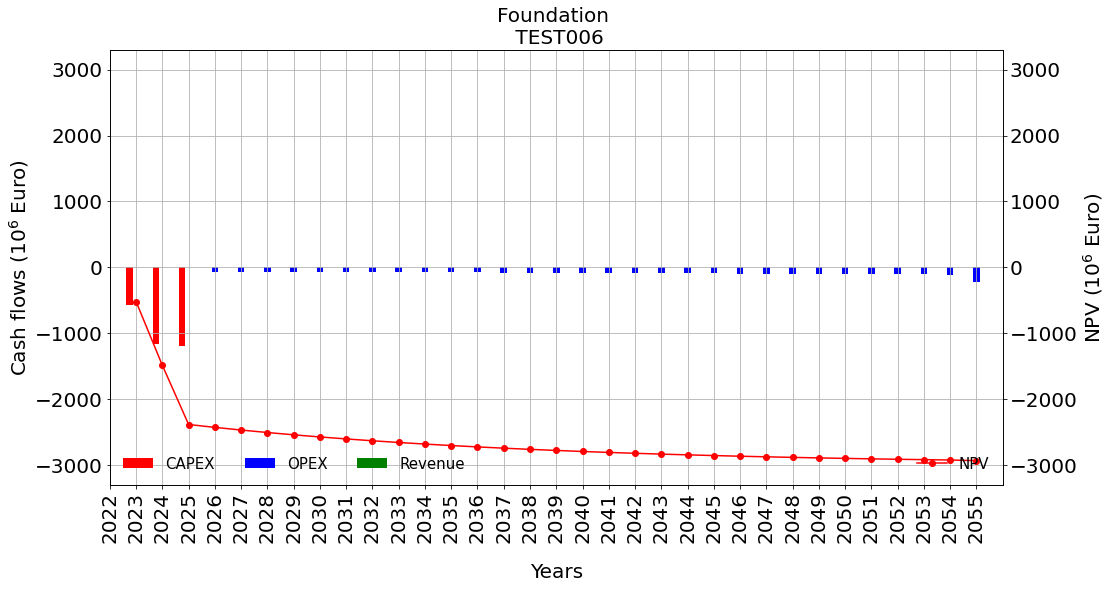

In [15]:
Foundation.generate_cashflows(startyear=2023, lifecycle=33, debug=False)
Foundation.df_npv = calculate_npv(Foundation.df, 2023, WACC=0.0984)
create_npv_plot(Foundation.df_npv, title='Foundation \n TEST006' )

##### TEST007
* escalation_base_year: 2023
* Lifecycle: 34
* startyear: 2023
* construction_duration: 3
* economic_lifetime: 30

Lifecycle selected exactly 1 economic lifetime + 4 years (enough to complete new capex cycle, and one operational year)

In [16]:
# create Foundation object
Foundation = Object(**foundation_data)

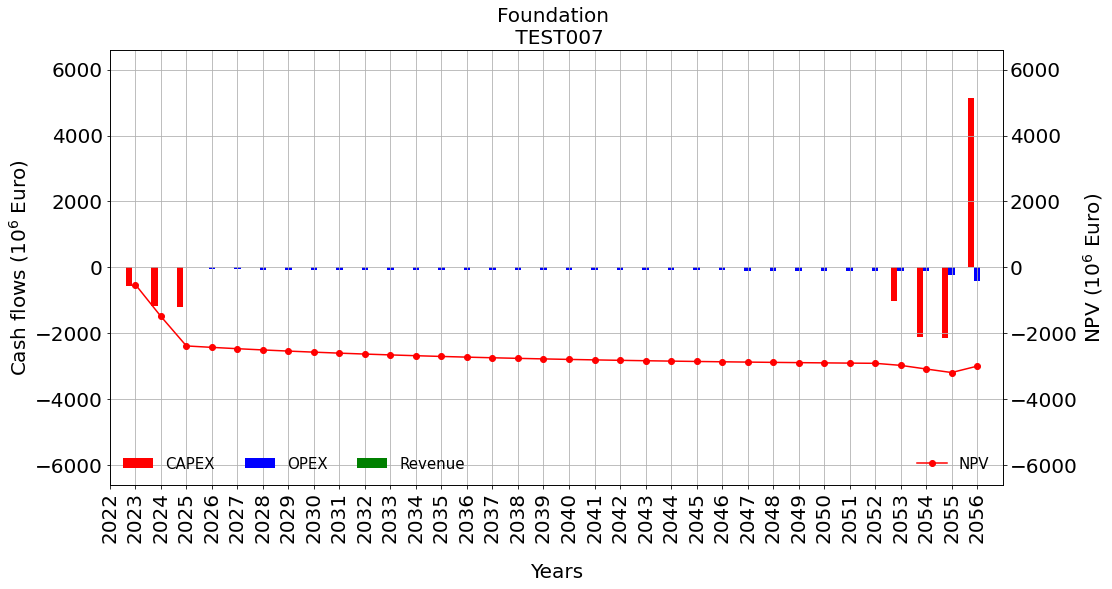

In [17]:
Foundation.generate_cashflows(startyear=2023, lifecycle=34, debug=False)
Foundation.df_npv = calculate_npv(Foundation.df, 2023, WACC=0.0984)
create_npv_plot(Foundation.df_npv, title='Foundation \n TEST007' )

##### TEST008
* escalation_base_year: 2023
* Lifecycle: 35
* startyear: 2023
* construction_duration: 3
* economic_lifetime: 30

Lifecycle selected exactly 1 economic lifetime + 5 years (enough to complete new capex cycle, and two operational years)

In [18]:
# create Foundation object
Foundation = Object(**foundation_data)

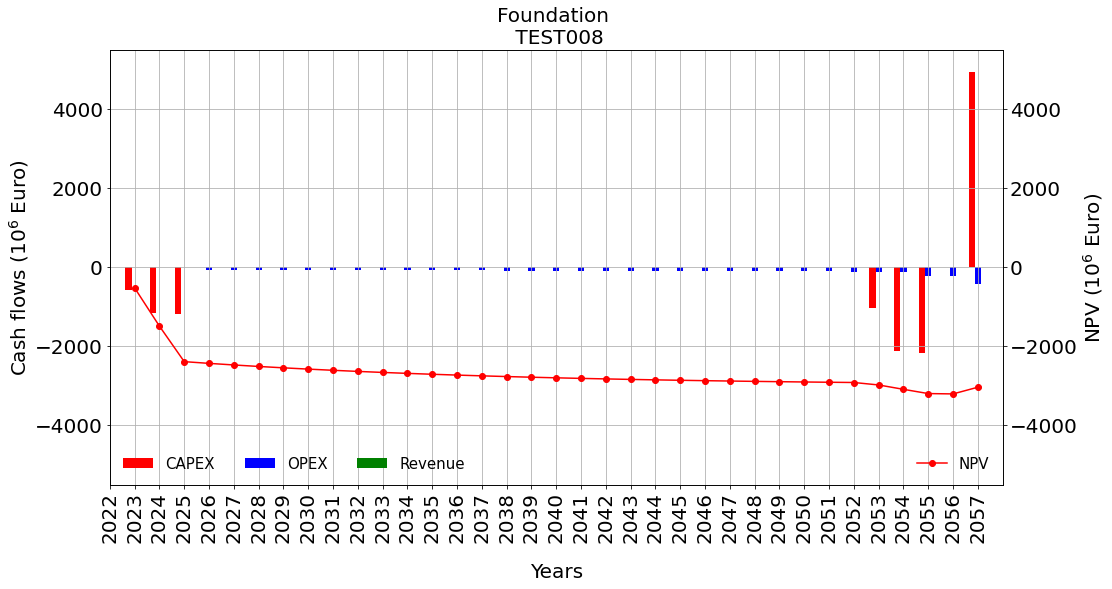

In [19]:
Foundation.generate_cashflows(startyear=2023, lifecycle=35, debug=False)
Foundation.df_npv = calculate_npv(Foundation.df, 2023, WACC=0.0984)
create_npv_plot(Foundation.df_npv, title='Foundation \n TEST008' )

##### TEST009
* escalation_base_year: 2023
* Lifecycle: 45
* startyear: 2033
* construction_duration: 3
* economic_lifetime: 30

startyear selected to be 10 years after the escalation_base_year. Lifecycle selected exactly 1 economic lifetime + 5 years (enough to complete new capex cycle, and two operational years)

In [20]:
# create Foundation object
Foundation = Object(**foundation_data)

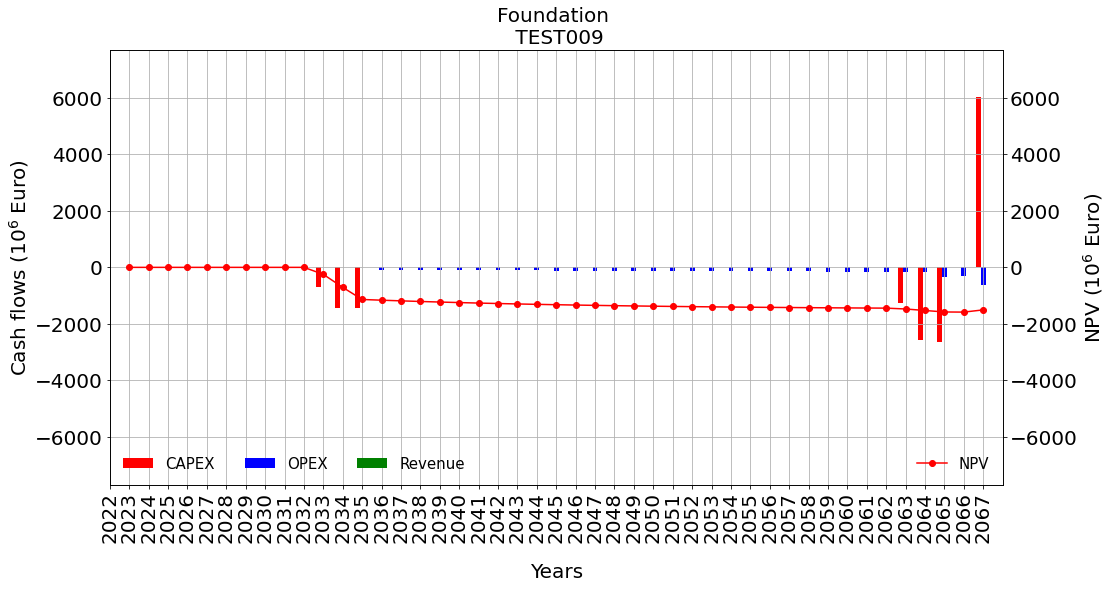

In [21]:
Foundation.generate_cashflows(startyear=2033, lifecycle=45, debug=False)
Foundation.df_npv = calculate_npv(Foundation.df, 2023, WACC=0.0984)
create_npv_plot(Foundation.df_npv, title='Foundation \n TEST009' )

##### TEST010
* escalation_base_year: 2023
* Lifecycle: 35
* startyear: 2033
* construction_duration: 3
* economic_lifetime: 30

Startyear selected to be 10 years after the escalation_base_year. Lifecycle selected such that the object runs for 25 years after startyear (so less than 1 economic lifetime)

In [22]:
# create Foundation object
Foundation = Object(**foundation_data)

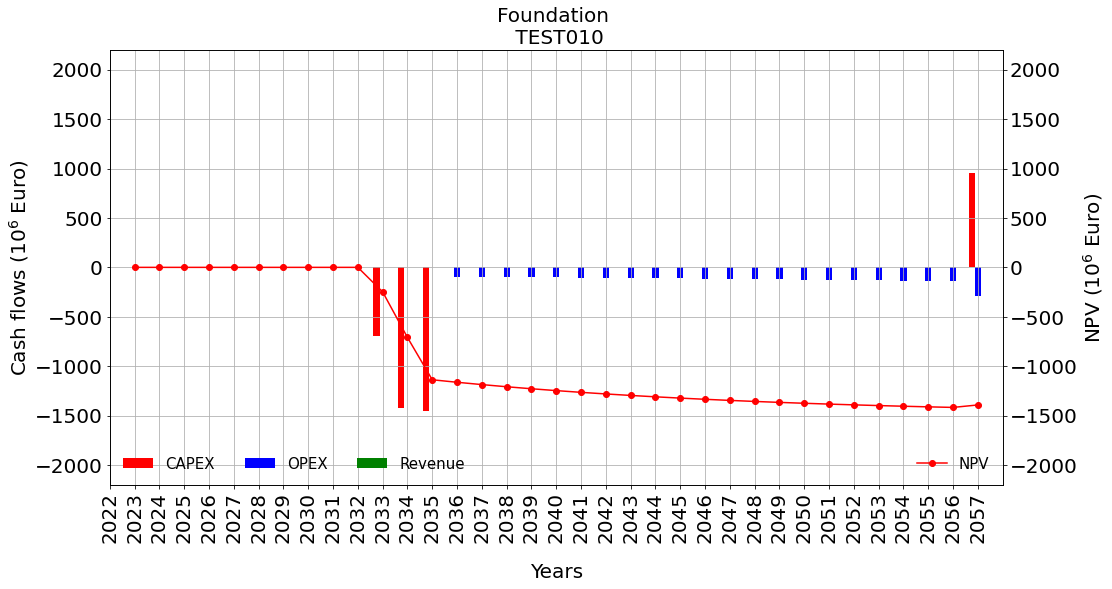

In [23]:
Foundation.generate_cashflows(startyear=2033, lifecycle=35, debug=False)
Foundation.df_npv = calculate_npv(Foundation.df, 2023, WACC=0.0984)
create_npv_plot(Foundation.df_npv, title='Foundation \n TEST010' )